<a href="https://colab.research.google.com/github/koushik2299/Data-Science/blob/main/DS_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are **2 Data files** which consists of **Sales of Used Cars** and **Sales of New Cars**

In [4]:
import pandas as pd

In [5]:
used_df = pd.read_excel("/content/data.xlsx",sheet_name=0)
new_df = pd.read_excel("/content/data.xlsx",sheet_name=1)

# Sales of Used Cars **EDA**

In [6]:
used_df.head()

,CUSTOMERID,VEHICLEID,TRANSACTION_DATE,BRAND,MODEL,COLOUR,ACTUAL_PRICE,DISCOUNTED RATIO,MODELYR,STORECODE,GENCO,GENDER,CUS_BIRTH_DATE
0,2741953,243834,2018-01-28,C,IMPALA,Silver Ice Metallic,221599.28582525,0.064453,2018.0,73,SIL,F,75/01/28 00:00:00
1,2357269,243635,2017-12-27,D,MALIBU,Coppertino Metallic,14654.951754,0.064372,2018.0,88,BRO,F,95/02/12 00:00:00
2,1366119,262206,2019-08-28,G,TRAVERSE,Summit White,22436.110791,0.067584,2019.0,71,WHI,F,89/09/01 00:00:00
3,0,267485,2019-08-29,G,CREW-CAB,Summit White,30461.502246,0.000000,2020.0,39,WHI,F,84/03/20 00:00:00
4,482589,231904,2017-01-31,G,TAHOE,Black,30488.934677,0.060465,2017.0,84,BLA,M,98/10/02 00:00:00


In [7]:
used_df['CUSTOMERID'].value_counts()

0          610
2590218     94
531506      58
482589      39
3070458     34
          ... 
2827119      1
447762       1
2522381      1
1836766      1
1040727      1
Name: CUSTOMERID, Length: 1672, dtype: int64

In [8]:
used_df['VEHICLEID'].value_counts()

243834    1
264209    1
246593    1
244351    1
251282    1
         ..
249101    1
249139    1
182837    1
249023    1
259385    1
Name: VEHICLEID, Length: 2956, dtype: int64

In [9]:
used_df['MODEL'].value_counts()

TAHOE           760
PICK-UP         292
MALIBU          263
IMPALA          219
Trail Blazer    204
TRAVERSE        153
EQUINOX         128
CREW-CAB         89
TRAX             74
AVEO             57
BLAZER           47
BLAZER SUV       47
SUBURBAN         45
XT5              45
CAPRICE          43
CAMARO           42
ESCALADE         41
CTS              35
XT4              30
CRUZE            25
ATS              21
CT6              21
SRX              19
CAPTIVA          17
XTS              17
CARGOVAN         16
PASSVAN          11
H3                7
LUMINA            6
tahoe             6
CORVETTE          4
AVEOO             3
IMPALAA           3
AVALANCHE         3
CAPRICE-X         2
BOLT EV           2
UPLANDER          2
VIEW              1
CONCOURS          1
DEVILLE           1
TACUMA            1
EPICA             1
Name: MODEL, dtype: int64

In [10]:
used_df.columns

Index(['CUSTOMERID', 'VEHICLEID', 'TRANSACTION_DATE', 'BRAND', 'MODEL',
       'COLOUR', 'ACTUAL_PRICE', 'DISCOUNTED RATIO', 'MODELYR', 'STORECODE',
       'GENCO', 'GENDER', 'CUS_BIRTH_DATE'],
      dtype='object')

In [11]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUSTOMERID        2956 non-null   int64  
 1   VEHICLEID         2956 non-null   int64  
 2   TRANSACTION_DATE  2286 non-null   object 
 3   BRAND             2804 non-null   object 
 4   MODEL             2804 non-null   object 
 5   COLOUR            2777 non-null   object 
 6   ACTUAL_PRICE      2956 non-null   object 
 7   DISCOUNTED RATIO  2780 non-null   float64
 8   MODELYR           2804 non-null   float64
 9   STORECODE         2956 non-null   int64  
 10  GENCO             2774 non-null   object 
 11  GENDER            2889 non-null   object 
 12  CUS_BIRTH_DATE    2585 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 300.3+ KB


The used cars data contains **12 features** and **2956 Observations**

Doing some Type Conversions to make the data workable

Actual Price Needs to be converted to Float

Date Columns need to be converted to Date Format

In [12]:
used_df.duplicated().sum()

0

Removing the Primary Keys and Checking for the Duplicates

In [13]:
used_df.drop(['CUSTOMERID','VEHICLEID'],axis=1,inplace=False).duplicated().sum()

0

By this we can clearly infer that There are **No Duplicates** in the Dataset

**Unique Values** accross the Dataset

In [14]:
for col in used_df.columns:
    unique_values = used_df[col].explode().unique()
    typee = used_df[col].dtype
    if len(unique_values) > 50:
        print(f"{col} has {len(unique_values)} unique values")
    else:
        print(f"{col} contains: {', '.join(map(str, unique_values))}")


CUSTOMERID has 1672 unique values
VEHICLEID has 2956 unique values
TRANSACTION_DATE has 637 unique values
BRAND contains: C, D, G, nan, T, K, H, E, M
MODEL contains: IMPALA, MALIBU, TRAVERSE, CREW-CAB, TAHOE, TRAX, EQUINOX, PICK-UP, nan, BLAZER SUV, Trail Blazer, XT4, CRUZE, SRX, AVEO, CAMARO, SUBURBAN, BLAZER, CTS, ATS, LUMINA, CONCOURS, PASSVAN, XT5, CAPRICE, AVEOO, ESCALADE, CAPTIVA, XTS, VIEW, CARGOVAN, H3, DEVILLE, CAPRICE-X, CT6, TACUMA, BOLT EV, IMPALAA, UPLANDER, CORVETTE, AVALANCHE, tahoe, EPICA
COLOUR has 157 unique values
ACTUAL_PRICE has 2144 unique values
DISCOUNTED RATIO has 2172 unique values
MODELYR contains: 2018.0, 2019.0, 2020.0, 2017.0, nan, 2014.0, 2012.0, 2015.0, 2009.0, 2007.0, 2016.0, 2008.0, 2011.0, 1994.0, 20.0, 2010.0, 2013.0, 2006.0, 2005.0, 2001.0, 1996.0, 2002.0
STORECODE has 100 unique values
GENCO contains: SIL, BRO, WHI, BLA, GRY, BLU, GOL, nan, RED, PUR, MAR, YEL, GRN, BEI, ORA
GENDER contains: F, M, n?a, nan
CUS_BIRTH_DATE has 2281 unique values


In [15]:
missing_count = used_df.isnull().sum()

# Calculate the percentage of missing values in each column
total_values = used_df.shape[0]
missing_percentage = (missing_count / total_values) * 100

# Create a new DataFrame to store the results
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

print(missing_data_summary)

                  Missing Count  Missing Percentage
CUSTOMERID                    0            0.000000
VEHICLEID                     0            0.000000
TRANSACTION_DATE            670           22.665765
BRAND                       152            5.142084
MODEL                       152            5.142084
COLOUR                      179            6.055480
ACTUAL_PRICE                  0            0.000000
DISCOUNTED RATIO            176            5.953992
MODELYR                     152            5.142084
STORECODE                     0            0.000000
GENCO                       182            6.156969
GENDER                       67            2.266576
CUS_BIRTH_DATE              371           12.550744


Based on this we can infer the following things

1. Number of Observations are 2956 and number of customers are 1672 so based on this we can infer we do have **repeated customers**

2. Most of the **Transaction dates are missing**

In [17]:
df = used_df
numeric_cols = df.columns[df.dtypes!='object']
categorical_cols = df.columns[df.dtypes=='object']
print("Number of Numerical Cols",len(numeric_cols),numeric_cols)
print("Number of Catageroical Cols",len(categorical_cols),categorical_cols)

Number of Numerical Cols 5 Index(['CUSTOMERID', 'VEHICLEID', 'DISCOUNTED RATIO', 'MODELYR', 'STORECODE'], dtype='object')
Number of Catageroical Cols 8 Index(['TRANSACTION_DATE', 'BRAND', 'MODEL', 'COLOUR', 'ACTUAL_PRICE', 'GENCO',
       'GENDER', 'CUS_BIRTH_DATE'],
      dtype='object')


In [26]:
(used_df['ACTUAL_PRICE'].astype('float'))

ValueError: ignored

TypeError: ignored

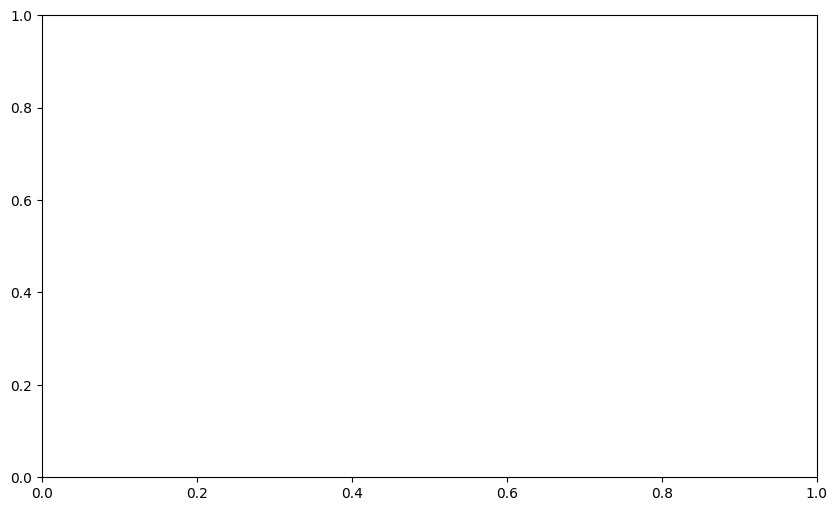

In [19]:
import matplotlib.pyplot as plt
column_name = 'ACTUAL_PRICE'
data=used_df
# Create a histogram
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(data[column_name], bins=20, edgecolor='black', color='blue', alpha=0.7)  # Customize bins, color, and transparency
plt.title(f'Histogram of {column_name}', fontsize=16)  # Customize title and font size
plt.xlabel(column_name, fontsize=14)  # Customize x-axis label and font size
plt.ylabel('Frequency', fontsize=14)  # Customize y-axis label and font size
plt.xticks(fontsize=12)  # Customize tick label font size
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Customize grid style and transparency

# Add a vertical line for mean or median (customize as needed)
mean_value = data[column_name].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label='Mean')

# Add legend
plt.legend()

# Display the histogram
plt.tight_layout()  # Adjust spacing
plt.show()

# Anomolies of the Used Cars Sales Data

1. Gender has Typos which need to be fixed
2. Transaction Dates are missing
